<a href="https://colab.research.google.com/github/muhamadsaepulrizal/Tugas_Praktikum_AI_CertaintyFactor_FuzzyLogic/blob/main/CertaintyFactor_FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CERTAINTY FACTOR

In [17]:
# Data gejala yang dirasakan user  tugass
gejala_user = {
    "demam": 0.2,
    "batuk": 0.5,
    "sakit tenggorokan": 0.6,
    # Menambahkan 5 gejala baru
    "pilek": 0.6,
    "sakit kepala": 0.7,
    "lemas": 0.4,
    "mata berair": 0.4,
    "menggigil": 0.3
}

# Basis pengetahuan pakar
pengetahuan = {
    "flu": {
        "demam": 0.8,
        "batuk": 0.7,
        "sakit tenggorokan": 0.6,
         # Tambah 5 gejala baru
        "pilek": 0.8,
        "sakit kepala": 0.7,
        "lemas": 0.6,
        "mata berair": 0.5,
        "menggigil": 0.4
    }
}

# Fungsi menghitung Certainty Factor (CF)
def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

# Hitung CF untuk diagnosis Flu
cf_flu = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis Flu setelah ditambahnya gejala dan perubahan nilai: {cf_flu:.2f}")

CF diagnosis Flu setelah ditambahnya gejala dan perubahan nilai: 0.95


**Penjelasn code diatas:**

Perubahan nilai demam menjadi 0.2 akan menurunkan CF total karena pengaruhnya yang lebih kecil dalam diagnosis flu dan dalam basis pengetahuan nilainya cukup besar, sehingga ketika jika nilai demam diubah menjadi 0.2 (dari sebelumnya 0.7), maka hasilnya akan lebih rendah, karena semakin rendah nilai CF dari gejala, maka dampaknya akan mengurangi CF total.

Penambahan 5 gejala baru dalam basis pengetahuan pakar memberikan lebih banyak kemungkinan kesesuaian dengan gejala yang dirasakan user, yang akan mempengaruhi nilai CF total. Gejala-gejala baru ini akan memberikan gambaran lebih lengkap tentang flu.

contoh 2: Diagnosa multiple penyakit

In [2]:
# Data gejala yang dirasakan user
gejala_user = {
    "nyeri sendi": 0.8,
    "bengkak sendi": 0.7,
    "kaku sendi pagi": 0.9,
    "demam_ringan": 0.3
}

# Basis pengetahuan pakar
pengetahuan = {
    "rheumatoid_arthritis": {
        "nyeri sendi": 0.9,
        "bengkak sendi": 0.8,
        "kaku sendi pagi": 0.9,
        "demam_ringan": 0.4
    },
    "osteoarthritis": {
        "nyeri sendi": 0.8,
        "bengkak sendi": 0.6,
        "kaku sendi pagi": 0.5
    }
}

# Fungsi menghitung Certainty Factor (CF)
def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

# Diagnosa berdasarkan gejala yang sama
for penyakit in pengetahuan:
    cf_result = hitung_cf(gejala_user, pengetahuan[penyakit])
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")

CF diagnosis rheumatoid_arthritis: 0.98
CF diagnosis osteoarthritis: 0.89


contoh 3 : diagnosa multiple penyakit dengan bobot gejala

In [3]:
# Example 4: Diabetes Diagnosis with Weighted Symptoms

# Gejala yang dirasakan user
gejala_user = {
    "sering_haus": 0.8,
    "sering_buang_air_kecil": 0.9,
    "penurunan_berat_badan": 0.6,
    "luka_lambat_sembuh": 0.7,
    "penglihatan_kabur": 0.5
}

# Pengetahuan pakar dengan bobot CF tiap gejala
pengetahuan = {
    "diabetes_tipe1": {
        "sering_haus": 0.9,
        "sering_buang_air_kecil": 0.9,
        "penurunan_berat_badan": 0.8,
        "luka_lambat_sembuh": 0.5
    },
    "diabetes_tipe2": {
        "sering_haus": 0.7,
        "sering_buang_air_kecil": 0.7,
        "penurunan_berat_badan": 0.5,
        "luka_lambat_sembuh": 0.8,
        "penglihatan_kabur": 0.6
    }
}

# Bobot kepentingan tiap gejala (skala 1-5)
bobot_gejala = {
    "sering_haus": 4,
    "sering_buang_air_kecil": 4,
    "penurunan_berat_badan": 3,
    "luka_lambat_sembuh": 5,
    "penglihatan_kabur": 2
}

# Fungsi menghitung CF berbobot
def hitung_cf_weighted(gejala_user, pengetahuan_pakar, bobot):
    cf_total = 0
    first = True
    total_bobot = 0

    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar and gejala in bobot:
            cf_pakar = pengetahuan_pakar[gejala]
            gejala_weight = bobot[gejala] / 5  # Normalisasi bobot (1–5 jadi 0.2–1.0)
            cf = cf_user * cf_pakar * gejala_weight

            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)

            total_bobot += gejala_weight

    # Normalisasi hasil berdasarkan jumlah bobot gejala yang cocok
    if total_bobot > 0:
        cf_total = cf_total / len([g for g in gejala_user if g in pengetahuan_pakar])

    return cf_total

# Diagnosa berdasarkan gejala berbobot
for penyakit in pengetahuan:
    cf_result = hitung_cf_weighted(gejala_user, pengetahuan[penyakit], bobot_gejala)
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")

CF diagnosis diabetes_tipe1: 0.23
CF diagnosis diabetes_tipe2: 0.18


contoh 4 : Diabetes Diagnosis with Weighted Symptoms

FUZZY LOGIC

In [4]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 30.2 MB/s eta 0:00:00


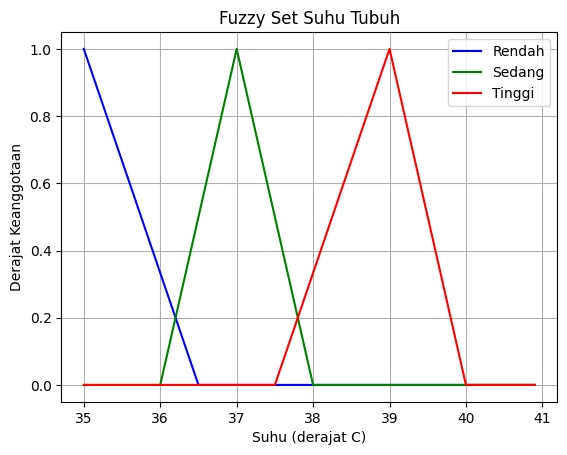

Derajat keanggotaan suhu 22 derajat C:
- Rendah : 0.00
- Sedang : 0.00
- Tinggi : 0.00


In [31]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Variabel suhu
suhu = np.arange(35, 41, 0.1)

# Fungsi keanggotaan
rendah = fuzz.trimf(suhu, [35, 35, 36.5])
sedang = fuzz.trimf(suhu, [36, 37, 38])
tinggi = fuzz.trimf(suhu, [37.5, 39, 40])

# Plot fungsi keanggotaan
plt.figure()
plt.plot(suhu, rendah, 'b', label='Rendah')
plt.plot(suhu, sedang, 'g', label='Sedang')
plt.plot(suhu, tinggi, 'r', label='Tinggi')
plt.title('Fuzzy Set Suhu Tubuh')
plt.xlabel('Suhu (derajat C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Input suhu
input_suhu = 22

# Derajat keanggotaan
suhu_rendah = fuzz.interp_membership(suhu, rendah, input_suhu)
suhu_sedang = fuzz.interp_membership(suhu, sedang, input_suhu)
suhu_tinggi = fuzz.interp_membership(suhu, tinggi, input_suhu)

# Output
print(f"Derajat keanggotaan suhu {input_suhu} derajat C:")
print(f"- Rendah : {suhu_rendah:.2f}")
print(f"- Sedang : {suhu_sedang:.2f}")
print(f"- Tinggi : {suhu_tinggi:.2f}")

**Penjelasan code diatas**

Karena suhu 22°C tidak berada dalam jangkauan nilai pada setiap fungsi keanggotaan (Rendah, Sedang, dan Tinggi), hasilnya nilai keanggotaan untuk semua kategori akan menjadi 0.0.

Rendah: Fungsi keanggotaan ini memiliki batas [35, 35, 36.5], yang berarti suhu 22°C tidak tercakup dalam fungsi keanggotaan ini.

Sedang: Fungsi keanggotaan ini memiliki batas [36, 37, 38], yang juga tidak mencakup suhu 22°C.

Tinggi: Fungsi keanggotaan ini memiliki batas [37.5, 39, 40], yang berarti 22°C sangat jauh di bawah kategori "Tinggi" juga.

klasifikasi tingkat air dalam tanki

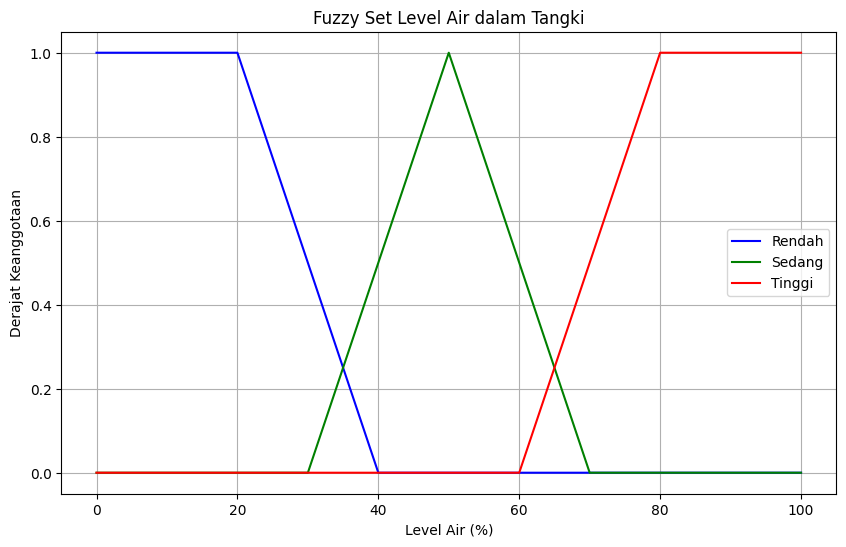

Derajat keanggotaan level air 25%:
- Rendah: 0.75
- Sedang: 0.00
- Tinggi: 0.00


In [18]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universe of discourse
level = np.arange(0, 101, 1)

# Fuzzy sets
rendah = fuzz.trapmf(level, [0, 0, 20, 40])
sedang = fuzz.trimf(level, [30, 50, 70])
tinggi = fuzz.trapmf(level, [60, 80, 100, 100])

# Visualize fuzzy sets
plt.figure(figsize=(10, 6))
plt.plot(level, rendah, 'b', linewidth=1.5, label='Rendah')
plt.plot(level, sedang, 'g', linewidth=1.5, label='Sedang')
plt.plot(level, tinggi, 'r', linewidth=1.5, label='Tinggi')
plt.title('Fuzzy Set Level Air dalam Tangki')
plt.xlabel('Level Air (%)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Calculate membership for a specific input
input_level = 25

level_rendah = fuzz.interp_membership(level, rendah, input_level)
level_sedang = fuzz.interp_membership(level, sedang, input_level)
level_tinggi = fuzz.interp_membership(level, tinggi, input_level)

print(f"Derajat keanggotaan level air {input_level}%:")
print(f"- Rendah: {level_rendah:.2f}")
print(f"- Sedang: {level_sedang:.2f}")
print(f"- Tinggi: {level_tinggi:.2f}")

Index Kualitas Udara

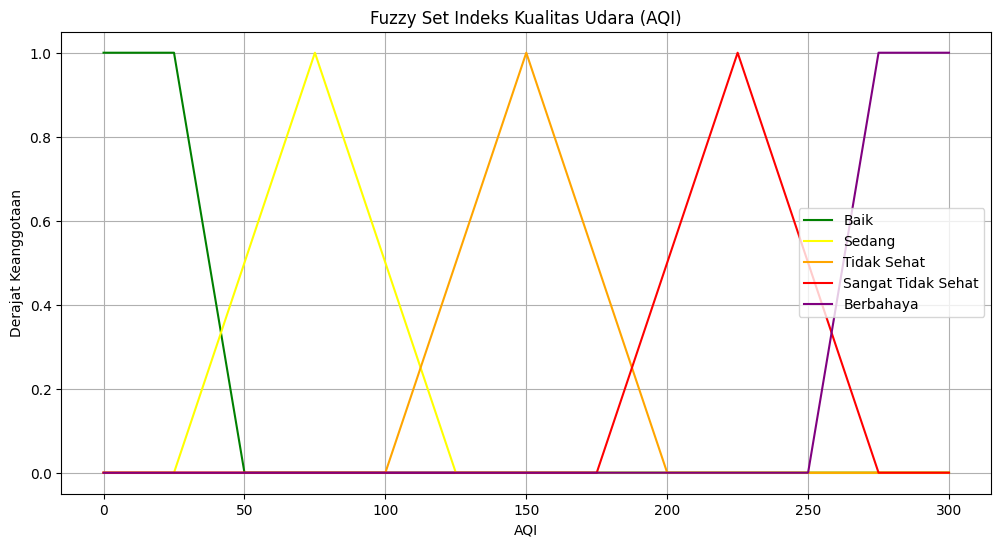

Derajat keanggotaan AQI 120:
- Baik               : 0.00
- Sedang             : 0.10
- Tidak Sehat        : 0.40
- Sangat Tidak Sehat : 0.00
- Berbahaya          : 0.00


In [7]:
import numpy as np #ugass
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universe of discourse
aqi = np.arange(0, 301, 1)

# Fuzzy sets for Air Quality Index
baik = fuzz.trapmf(aqi, [0, 0, 25, 50])
sedang = fuzz.trimf(aqi, [25, 75, 125])
tidak_sehat = fuzz.trimf(aqi, [100, 150, 200])
sangat_tidak_sehat = fuzz.trimf(aqi, [175, 225, 275])
berbahaya = fuzz.trapmf(aqi, [250, 275, 300, 300])

# Visualize fuzzy sets
plt.figure(figsize=(12, 6))
plt.plot(aqi, baik, 'green', linewidth=1.5, label='Baik')
plt.plot(aqi, sedang, 'yellow', linewidth=1.5, label='Sedang')
plt.plot(aqi, tidak_sehat, 'orange', linewidth=1.5, label='Tidak Sehat')
plt.plot(aqi, sangat_tidak_sehat, 'red', linewidth=1.5, label='Sangat Tidak Sehat')
plt.plot(aqi, berbahaya, 'purple', linewidth=1.5, label='Berbahaya')
plt.title("Fuzzy Set Indeks Kualitas Udara (AQI)")
plt.xlabel("AQI")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True)
plt.show()

# Calculate membership for a specific input
input_aqi = 120

aqi_baik = fuzz.interp_membership(aqi, baik, input_aqi)
aqi_sedang = fuzz.interp_membership(aqi, sedang, input_aqi)
aqi_tidak_sehat = fuzz.interp_membership(aqi, tidak_sehat, input_aqi)
aqi_sangat_tidak_sehat = fuzz.interp_membership(aqi, sangat_tidak_sehat, input_aqi)
aqi_berbahaya = fuzz.interp_membership(aqi, berbahaya, input_aqi)

print(f"Derajat keanggotaan AQI {input_aqi}:")
print(f"- Baik               : {aqi_baik:.2f}")
print(f"- Sedang             : {aqi_sedang:.2f}")
print(f"- Tidak Sehat        : {aqi_tidak_sehat:.2f}")
print(f"- Sangat Tidak Sehat : {aqi_sangat_tidak_sehat:.2f}")
print(f"- Berbahaya          : {aqi_berbahaya:.2f}")

kontrol air conditioner

Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: 50.00%


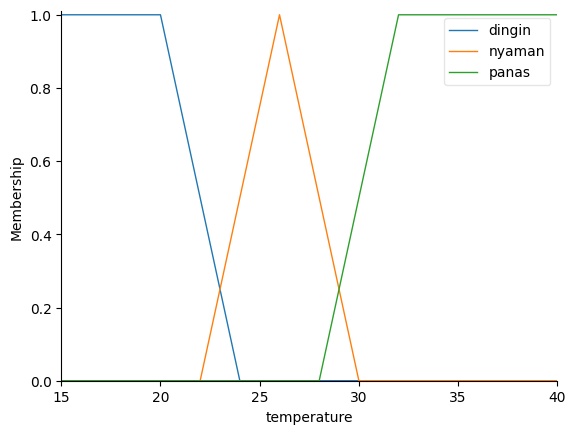

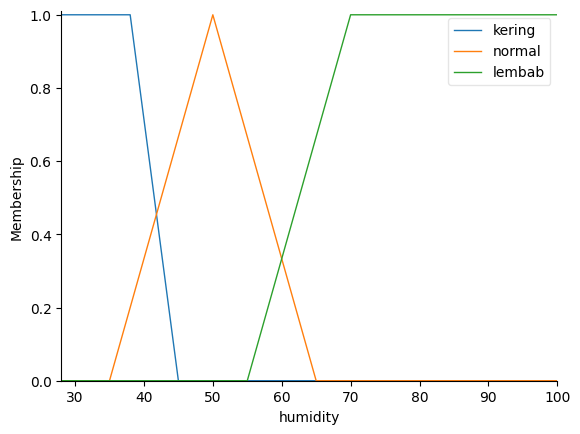

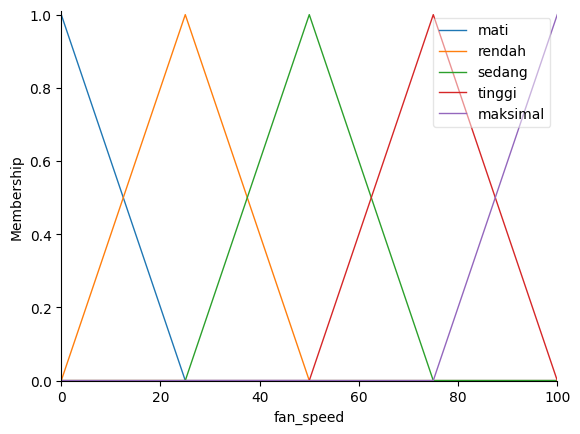

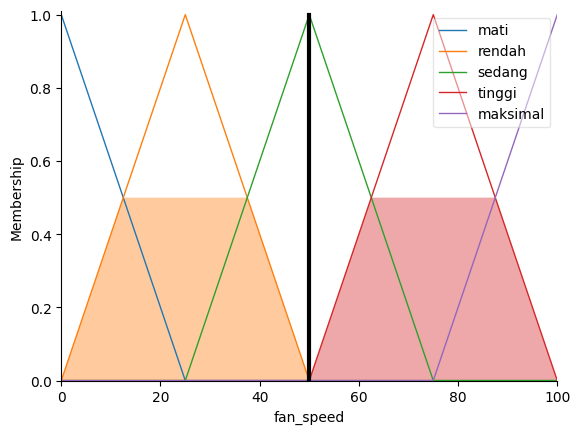

In [35]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(28, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [28, 28, 38, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['maksimal'])
# Aturan baru
rule10 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['rendah'])
rule11 = ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['sedang'])
rule12 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])


# Create control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
ac = ctrl.ControlSystemSimulation(ac_ctrl)


# Input values
ac.input['temperature'] = 28
ac.input['humidity'] = 75

# Compute result
ac.compute()
print(f"Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

# Visualize result
fan_speed.view(sim=ac)
plt.show()

**Penjelasan code diatas**

Suhu 28°C memiliki nilai keanggotaan di "Nyaman" dan "Panas" karena berada di perbatasan antara kedua kategori tersebut, sehingga suhu ini berinteraksi dengan kedua fungsi keanggotaan tersebut.

Keanggotaan pada "Nyaman": Karena 28°C berada di dalam rentang suhu "Nyaman" (22°C - 30°C), maka nilai keanggotaan pada kategori ini akan cukup signifikan.

Keanggotaan pada "Panas": Karena 28°C juga berada di rentang suhu "Panas" (28°C - 40°C), maka nilai keanggotaan pada kategori ini juga akan cukup besar.
